# Increasing Triplet Subsequence - Interactive Demo

## Problem Statement
Given an integer array `nums`, return `true` if there exists a triple of indices `(i, j, k)` such that `i < j < k` and `nums[i] < nums[j] < nums[k]`.

**Constraints:**
- 1 ≤ nums.length ≤ 5 × 10⁵
- -2³¹ ≤ nums[i] ≤ 2³¹ - 1

**Follow up:** Could you implement a solution that runs in O(n) time complexity and O(1) space complexity?


In [21]:
import matplotlib.pyplot as plt
import numpy as np

class Solution:
    def increasingTriplet(self, nums: list[int]) -> bool:
        """
        Find if there exists an increasing triplet subsequence.
        
        Time Complexity: O(n)
        Space Complexity: O(1)
        """
        if len(nums) < 3:
            return False
        
        first = float('inf')
        second = float('inf')
        
        for num in nums:
            if num <= first:
                first = num
            elif num <= second:
                second = num
            else:
                return True
        
        return False

# Create solution instance
solution = Solution()


Matplotlib is building the font cache; this may take a moment.


## Algorithm Explanation

The key insight is to keep track of the **smallest** and **second smallest** values we've seen so far:

1. **`first`**: The smallest value encountered
2. **`second`**: The smallest value greater than `first`

When we find a number greater than both `first` and `second`, we've found our triplet!

**Why this works:** Even if `first` gets updated later, we remember that we had a valid pair `(old_first, second)`, so finding any number > `second` completes the triplet.


In [22]:
def visualize_algorithm(nums):
    """Visualize the step-by-step execution of the algorithm"""
    
    print(f"Input array: {nums}")
    print("=" * 50)
    
    first = float('inf')
    second = float('inf')
    
    for i, num in enumerate(nums):
        print(f"Step {i+1}: Processing num = {num}")
        
        if num <= first:
            first = num
            print(f"  → Updated first = {first}")
        elif num <= second:
            second = num
            print(f"  → Updated second = {second}")
        else:
            print(f"  → Found triplet! {first} < {second} < {num}")
            return True
            
        first_str = str(first) if first != float('inf') else '∞'
        second_str = str(second) if second != float('inf') else '∞'
        print(f"  → Current state: first = {first_str}, second = {second_str}")
        print()
    
    print("No increasing triplet found!")
    return False


## Example 1: True Case
Let's trace through an example that returns `True`:


In [23]:
# Example from the original code
test_array_1 = [2, 1, 5, 0, 4, 6]
result = visualize_algorithm(test_array_1)
print(f"\nFinal result: {result}")


Input array: [2, 1, 5, 0, 4, 6]
Step 1: Processing num = 2
  → Updated first = 2
  → Current state: first = 2, second = ∞

Step 2: Processing num = 1
  → Updated first = 1
  → Current state: first = 1, second = ∞

Step 3: Processing num = 5
  → Updated second = 5
  → Current state: first = 1, second = 5

Step 4: Processing num = 0
  → Updated first = 0
  → Current state: first = 0, second = 5

Step 5: Processing num = 4
  → Updated second = 4
  → Current state: first = 0, second = 4

Step 6: Processing num = 6
  → Found triplet! 0 < 4 < 6

Final result: True


In [24]:
test_array_2 = [5, 4, 3, 2, 1]
result = visualize_algorithm(test_array_2)
print(f"\nFinal result: {result}")


Input array: [5, 4, 3, 2, 1]
Step 1: Processing num = 5
  → Updated first = 5
  → Current state: first = 5, second = ∞

Step 2: Processing num = 4
  → Updated first = 4
  → Current state: first = 4, second = ∞

Step 3: Processing num = 3
  → Updated first = 3
  → Current state: first = 3, second = ∞

Step 4: Processing num = 2
  → Updated first = 2
  → Current state: first = 2, second = ∞

Step 5: Processing num = 1
  → Updated first = 1
  → Current state: first = 1, second = ∞

No increasing triplet found!

Final result: False


In [25]:
# Try your own test case here!
your_test = [1, 5, 3, 4, 7]  # Change this array

print("Testing your custom array:")
result = visualize_algorithm(your_test)
print(f"\nResult: {result}")

# Quick verification with the original solution
print(f"Original solution result: {solution.increasingTriplet(your_test)}")


Testing your custom array:
Input array: [1, 5, 3, 4, 7]
Step 1: Processing num = 1
  → Updated first = 1
  → Current state: first = 1, second = ∞

Step 2: Processing num = 5
  → Updated second = 5
  → Current state: first = 1, second = 5

Step 3: Processing num = 3
  → Updated second = 3
  → Current state: first = 1, second = 3

Step 4: Processing num = 4
  → Found triplet! 1 < 3 < 4

Result: True
Original solution result: True


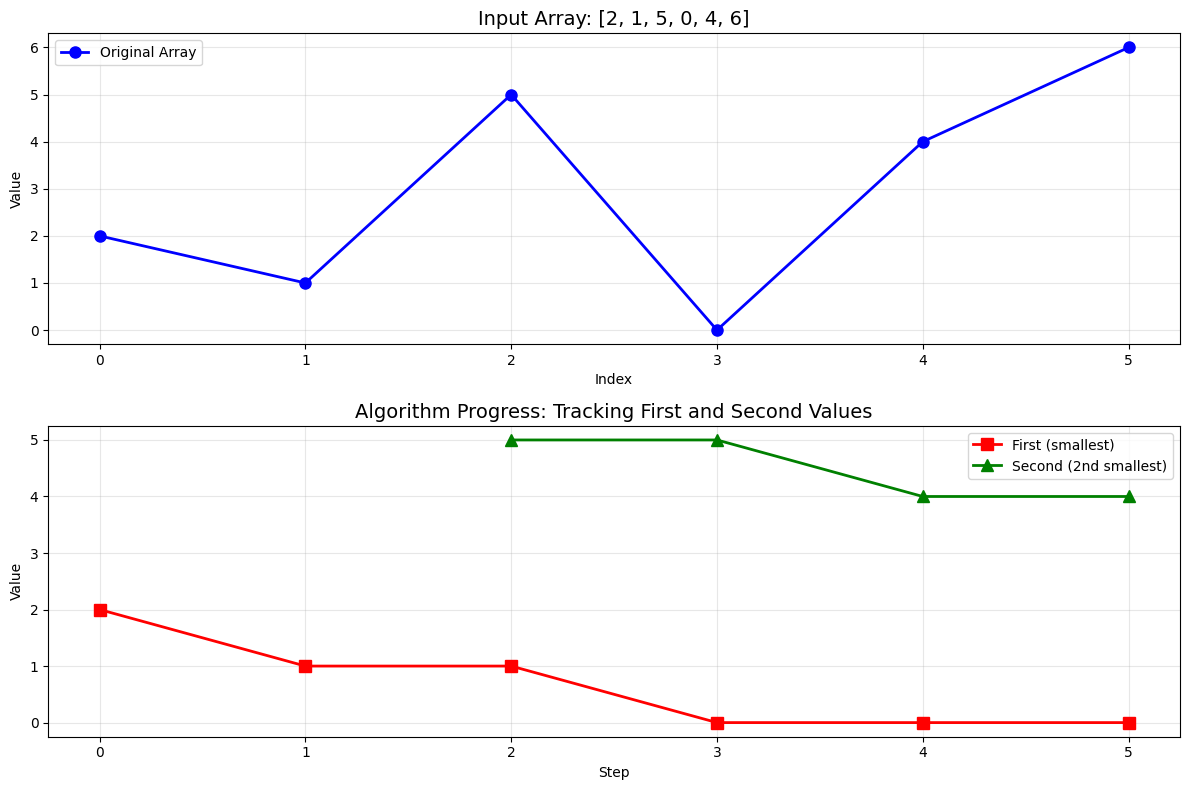

In [26]:
def plot_algorithm_progress(nums):
    """Create a visualization of the algorithm's progress"""
    
    first_values = []
    second_values = []
    
    first = float('inf')
    second = float('inf')
    
    for num in nums:
        if num <= first:
            first = num
        elif num <= second:
            second = num
        else:
            # Found triplet
            first_values.append(first if first != float('inf') else None)
            second_values.append(second if second != float('inf') else None)
            break
            
        first_values.append(first if first != float('inf') else None)
        second_values.append(second if second != float('inf') else None)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot the original array
    x = range(len(nums))
    plt.subplot(2, 1, 1)
    plt.plot(x, nums, 'b-o', linewidth=2, markersize=8, label='Original Array')
    plt.title(f'Input Array: {nums}', fontsize=14)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Plot the algorithm progress
    plt.subplot(2, 1, 2)
    x_progress = range(len(first_values))
    
    plt.plot(x_progress, first_values, 'r-s', linewidth=2, markersize=8, label='First (smallest)')
    plt.plot(x_progress, second_values, 'g-^', linewidth=2, markersize=8, label='Second (2nd smallest)')
    
    plt.title('Algorithm Progress: Tracking First and Second Values', fontsize=14)
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Visualize the successful example
plot_algorithm_progress([2, 1, 5, 0, 4, 6])


Performance Test Results:
Size:   1000 | Time: 0.0021 ms | Result: True
Size:   5000 | Time: 0.0041 ms | Result: True
Size:  10000 | Time: 0.0021 ms | Result: True
Size:  50000 | Time: 0.0029 ms | Result: True
Size: 100000 | Time: 0.0029 ms | Result: True


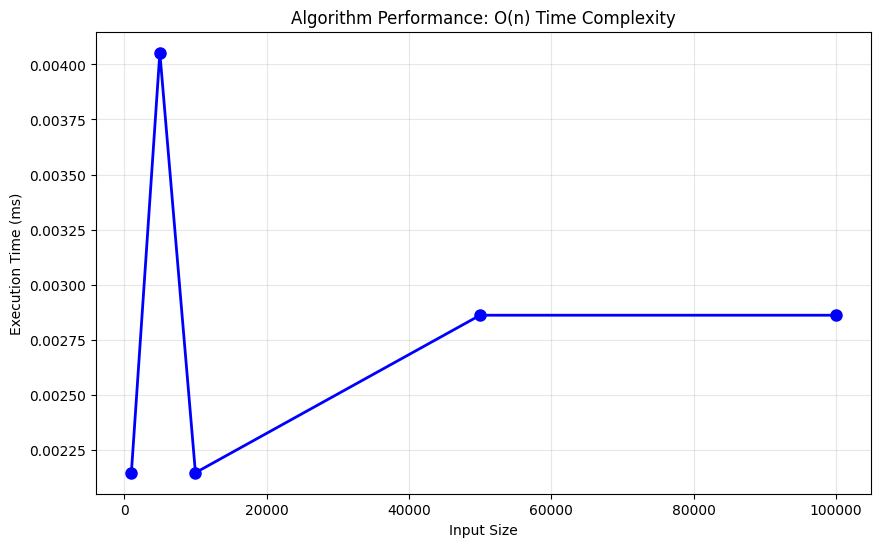

In [27]:
import time
import random

def performance_test():
    """Test the algorithm's performance with different input sizes"""
    
    sizes = [1000, 5000, 10000, 50000, 100000]
    times = []
    
    for size in sizes:
        # Generate random array
        test_array = [random.randint(1, 1000) for _ in range(size)]
        
        # Measure execution time
        start_time = time.time()
        result = solution.increasingTriplet(test_array)
        end_time = time.time()
        
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        times.append(execution_time)
        
        print(f"Size: {size:6d} | Time: {execution_time:.4f} ms | Result: {result}")
    
    # Plot performance
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (ms)')
    plt.title('Algorithm Performance: O(n) Time Complexity')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return sizes, times

print("Performance Test Results:")
sizes, times = performance_test()
